In [2]:
import pandas as pd

df2308 = pd.read_csv('data/서울특별시_전동킥보드_견인_현황_20230831.csv', encoding = 'cp949')

In [3]:
df2308.head()

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15


In [4]:
df2308.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123727 entries, 0 to 123726
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      123727 non-null  int64 
 1   신고일     123727 non-null  object
 2   구정보     123727 non-null  object
 3   주소      123727 non-null  object
 4   유형      123726 non-null  object
 5   조치일     123726 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.7+ MB


유형 칼럼과 조치일 칼럼에 결측치 하나씩 존재. 확인 필요.

In [5]:
df2308[df2308['유형'].isnull()]

,번호,신고일,구정보,주소,유형,조치일
2815,2816,2021-08-17,관악구,서울특별시 관악구 신림동 1467-10,NaN,NaN


결측치 제거

In [6]:
df2308.dropna(inplace=True)

사라진 거 확인

In [7]:
df2308.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123726 entries, 0 to 123726
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      123726 non-null  int64 
 1   신고일     123726 non-null  object
 2   구정보     123726 non-null  object
 3   주소      123726 non-null  object
 4   유형      123726 non-null  object
 5   조치일     123726 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.6+ MB


### 지금까지 상황 정리
- 서울시 전동킥보드 견인 현황 : https://data.seoul.go.kr/dataList/OA-21304/S/1/datasetView.do
- 서울시 전동킥보드 주차구역 현황 : https://data.seoul.go.kr/dataList/OA-21710/S/1/datasetView.do
- 
- 전화 신고도 있고 웹페이지 신고도 있는듯 : https://seoul-pm.eseoul.go.kr/mobile/report/main.do
- 웹페이지 신고는 QR 찍어서 공유킥보드 회사, 킥보드ID 수집하는듯.
- 
- 파일은 최신 파일만 보면 됨. 이전 파일에 담긴 내용 다 포함하고 있음.
- 2021년 7월 15일부터 시작.
- 결측치는 21년 8월 17일에 딱 하나 존재 -> 제거
- 2023년 8월부터는 유형 칼럼이 정해진 값대로 작성되지 않고 민원내용을 그대로 복붙해놓고 있음. -> 데이터 범위를 21년 7월부터 23년 7월까지만 다루면 될듯.
- 유형 칼럼에서 오신고 행 존재 -> 제거해야 함.
- 
- 기본적으로 월별로 어느 지역에서 견인이 가장 많이 이뤄지는지 확인해 볼 수 있음.
- 
- 처음엔 6개 자치구에서 시작해서 25개 자치구 전체로 확대됨. -> 그 시점 파악해 볼 것.
- 2022년 3월 22일 이후 견인유예 제도 시행 -> 이 때 전후 견인량 차이도 볼 것 : https://biz.chosun.com/topics/topics_social/2022/03/22/VVT6BLMHXJDAZEOQIC3XZLUKZY/
- 공유킥보드 주차공간도 이 때 이후로 생긴 듯 -> 주차공간 생긴 지역 견인량 차이도 볼 것 : https://news.mt.co.kr/mtview.php?no=2023090315024460221
- 견인업체가 셀프신고하는 문제 : https://www.sisaweek.com/news/articleView.html?idxno=201606
- 
- 운행기록 데이터가 있어야 더 깊은 분석 가능할듯. 하지만 당장 다운받을 수 있는 운행기록 데이터는 찾지 못 함.
- 국가교통데이터 오픈마켓 : https://www.bigdata-transportation.kr/frn/prdt/detail?prdtId=PRDTNUM_000000020360
- 지오비전 퍼즐 : https://puzzle.geovision.co.kr/data/%EA%B3%B5%EC%9C%A0-%ED%82%A5%EB%B3%B4%EB%93%9C-%EC%9D%B4%EC%9A%A9-d1651650511283
- 유동인구 데이터를 구해야 하나?

### 2년 범위 설정

In [8]:
df2308[df2308['신고일'] < '2023-07-15']

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
114494,114495,2023-07-14,종로구,서울특별시 종로구 내수동 72,"횡단보도, 산책로 등",2023-07-14
114495,114496,2023-07-14,관악구,서울특별시 관악구 봉천동 1718,"횡단보도, 산책로 등",2023-07-14
114496,114497,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,보도 중앙,2023-07-14
114497,114498,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,"버스정류장, 택시 승강장",2023-07-14


In [9]:
df2y = df2308[df2308['신고일'] < '2023-07-15']

### 유형 칼럼에서 오신고 행 삭제

In [10]:
df2y['유형'].unique()

array(['보도와 차도가 구분된 도로의 차도', '보도 중앙', '버스정류장, 택시 승강장', '횡단보도, 산책로 등',
       '기타', '소방시설 5m 이내 구역', '건물, 상가 보행자 진출입', '점자블록, 엘리베이터 입구',
       '육교위, 지하보차도 안', '자전거 도로', '지하철역 진출입로 및 주변', '오신고', '턱을 낮춘 진출입로',
       '통행제한 구간', '계단, 난간'], dtype=object)

In [11]:
df2y[df2y['유형'] == '오신고']

,번호,신고일,구정보,주소,유형,조치일
686,687,2021-07-22,마포구,서울특별시 마포구 공덕동 237-9,오신고,2021-07-22
2262,2263,2021-08-10,동작구,서울특별시 동작구 노량진동 114-8,오신고,2021-08-10
2299,2300,2021-08-10,동작구,서울특별시 동작구 신대방동 370-1,오신고,2021-08-10
2531,2532,2021-08-12,동작구,서울특별시 동작구 상도동 126-118,오신고,2021-08-13
3927,3928,2021-08-26,동작구,서울특별시 동작구 신대방동 345-6,오신고,2021-08-26
...,...,...,...,...,...,...
111973,111974,2023-06-30,성동구,서울특별시 성동구 상왕십리동 759-1,오신고,2023-06-30
112144,112145,2023-07-03,중구,서울특별시 중구 서소문동 37,오신고,2023-07-18
112822,112823,2023-07-05,용산구,서울특별시 용산구 효창동 255-3,오신고,2023-07-05
113619,113620,2023-07-10,중구,서울특별시 중구 신당동 251-160,오신고,2023-07-10


In [12]:
df2y[df2y['유형'] != '오신고']

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
114494,114495,2023-07-14,종로구,서울특별시 종로구 내수동 72,"횡단보도, 산책로 등",2023-07-14
114495,114496,2023-07-14,관악구,서울특별시 관악구 봉천동 1718,"횡단보도, 산책로 등",2023-07-14
114496,114497,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,보도 중앙,2023-07-14
114497,114498,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,"버스정류장, 택시 승강장",2023-07-14


In [13]:
valid_df2y = df2y[df2y['유형'] != '오신고']

In [14]:
valid_df2y.reset_index(drop=True, inplace=True)

In [15]:
valid_df2y.head()

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15


### 시각화

구별 신고 건수 카운트해주는 dataframe 생성

In [16]:
count_df = valid_df2y.pivot_table(index=valid_df2y['신고일'], columns=valid_df2y['구정보'], aggfunc='count')['번호']

In [17]:
count_df.head()

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고일,,,,,,,,,,,,,,,,,,,,,
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,25.0,NaN,58.0,1.0,NaN,NaN,1.0,NaN
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,20.0,NaN,56.0,NaN,NaN,NaN,NaN,NaN
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,25.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN


구별 건수 합계 칼럼 생성

In [18]:
count_df['total_count'] = count_df.sum(axis = 1)

칼럼 생성 확인

In [19]:
count_df.head()

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,total_count
신고일,,,,,,,,,,,,,,,,,,,,,
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,35.0
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,153.0
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,25.0,NaN,58.0,1.0,NaN,NaN,1.0,NaN,158.0
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,20.0,NaN,56.0,NaN,NaN,NaN,NaN,NaN,119.0
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,25.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,128.0


c:\Users\SBA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SBA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SBA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


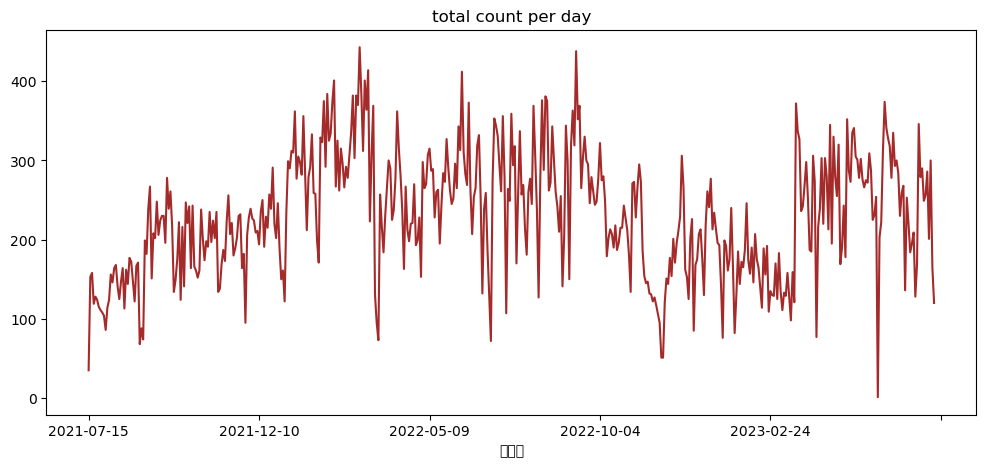

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
count_df['total_count'].plot.line(color='brown')
plt.title('total count per day')
plt.show();

In [21]:
import plotly.express as px

fig = px.line(count_df, y='total_count', title='서울 전 지역(25개 구) 일 견인 건수 합계')
fig.show();

이제 이 그래프를 구별로 색깔 나눠서 그려주고 싶다

In [31]:
guList = list(count_df.reset_index().columns[1:-3])
guList

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [32]:
count_df.reset_index().melt(id_vars=['신고일'], value_vars=guList)

,신고일,구정보,value
0,2021-07-15,강남구,NaN
1,2021-07-16,강남구,NaN
2,2021-07-19,강남구,NaN
3,2021-07-20,강남구,NaN
4,2021-07-21,강남구,NaN
...,...,...,...
12420,2023-07-10,중랑구,1.0
12421,2023-07-11,중랑구,14.0
12422,2023-07-12,중랑구,5.0
12423,2023-07-13,중랑구,10.0


In [33]:
count_dfM = count_df.reset_index().melt(id_vars=['신고일'], value_vars=guList)

In [34]:
fig = px.line(count_dfM, x='신고일', y='value', color='구정보', title='서울 전 지역(25개 구) 일 견인 건수 합계(구 별)')
fig.show();

In [35]:
import plotly.graph_objects as go

fig = go.Figure()
for gu in guList:
    gu_count_dfM = count_dfM[count_dfM['구정보'] == gu]
    fig.add_trace(go.Scatter(x=gu_count_dfM['신고일'], y=gu_count_dfM['value'], connectgaps=True))
fig.show();

- 금천구는 몇 건 없음. 정확하게 알아볼 것.
- 구별로 신고일 시작일자 확인해 볼 것. 가장 늦게 시작한 구는 어딘지.
- 처음 1년 간은 마포구가 많았고, 다음 1년은 성동구랑 강남구가 많은 듯. -> 이게 주차구역 개수랑 매칭이 잘 되는지 확인해볼 것.
- 꾸준하게 기록이 많이 된 곳은 영등포구인 듯. 시계열 인터랙티브 지도(?)를 그린다면 영등포구 기준으로 해도 좋을 듯. 근데 영등포는 주차구역이 없는 듯...

---

금천구 데이터 확인

In [36]:
count_dfM[(count_dfM['구정보'] == '금천구') & (count_dfM['value'].notnull())]

,신고일,구정보,value
3519,2021-09-10,금천구,1.0
3711,2022-06-24,금천구,1.0
3877,2023-02-22,금천구,3.0
3882,2023-03-02,금천구,1.0
3885,2023-03-07,금천구,1.0
3908,2023-04-07,금천구,1.0
3909,2023-04-10,금천구,1.0


In [37]:
valid_df2y[valid_df2y['구정보'] == '금천구']

,번호,신고일,구정보,주소,유형,조치일
5777,5788,2021-09-10,금천구,서울특별시 금천구 독산동 996,기타,2021-09-10
54134,54177,2022-06-24,금천구,서울특별시 금천구 독산동 1121-3,"건물, 상가 보행자 진출입",2022-06-24
90800,90974,2023-02-22,금천구,서울특별시 금천구 가산동 143-47,보도와 차도가 구분된 도로의 차도,2023-02-22
90807,90981,2023-02-22,금천구,서울특별시 금천구 독산동 974,보도 중앙,2023-02-22
90812,90986,2023-02-22,금천구,서울특별시 금천구 독산동 890,보도 중앙,2023-02-22
91537,91722,2023-03-02,금천구,서울특별시 금천구 시흥동 1000-93,"건물, 상가 보행자 진출입",2023-03-02
92029,92221,2023-03-07,금천구,서울특별시 금천구 가산동 148-24,"건물, 상가 보행자 진출입",2023-03-07
96808,97020,2023-04-07,금천구,서울특별시 금천구 가산동 327-14,보도 중앙,2023-04-07
97161,97376,2023-04-10,금천구,서울특별시 금천구 독산동 332-35,"건물, 상가 보행자 진출입",2023-04-10


원래 이렇게 적은 건지, 아니면 누락된 건지 확인해 볼 것.
- 구청 홈페이지 보도자료에는 22년 1월 3일부터 시작했다고 함 : https://www.geumcheon.go.kr/portal/selectBbsNttView.do?key=297&id=&bbsNo=8&nttNo=227096&searchCtgry=&searchCnd=all&searchKrwd=&pageIndex=43&integrDeptCode=&searchDeptCode=

---

견인 가장 늦게 시작한 구 어딘지 확인
- null값 제거해서 groupby

In [38]:
count_dfM[count_dfM['value'].notnull()]

,신고일,구정보,value
23,2021-08-18,강남구,1.0
34,2021-09-02,강남구,1.0
117,2022-01-04,강남구,39.0
118,2022-01-05,강남구,41.0
119,2022-01-06,강남구,32.0
...,...,...,...
12420,2023-07-10,중랑구,1.0
12421,2023-07-11,중랑구,14.0
12422,2023-07-12,중랑구,5.0
12423,2023-07-13,중랑구,10.0


In [39]:
count_dfM[count_dfM['value'].notnull()].groupby('구정보')['신고일'].min()

구정보
강남구     2021-08-18
강동구     2021-09-15
강북구     2021-12-01
강서구     2021-11-03
관악구     2021-08-02
광진구     2021-09-01
구로구     2021-09-23
금천구     2021-09-10
노원구     2021-11-15
도봉구     2021-07-19
동대문구    2021-08-17
동작구     2021-07-15
마포구     2021-07-15
서대문구    2021-08-02
서초구     2021-07-21
성동구     2021-08-09
성북구     2021-08-06
송파구     2021-07-16
양천구     2021-10-25
영등포구    2021-07-15
용산구     2021-07-19
은평구     2021-12-13
종로구     2021-08-02
중구      2021-07-19
중랑구     2021-09-01
Name: 신고일, dtype: object

In [40]:
max(count_dfM[count_dfM['value'].notnull()].groupby('구정보')['신고일'].min())

'2021-12-13'

해당 데이터는 은평구. 은평구가 가장 늦게 시작했다. 이걸 어떻게 시각화해야 한눈에 잘 드러날까...?

---

새로운 파일에서 구별 주차구역 개수 확인

In [41]:
parking_df = pd.read_csv('data/서울시 전동킥보드 주차구역 현황.csv', encoding = 'cp949')

In [44]:
parking_df.head()

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기
0,1,종로구,팔판동 115-63,청와대 춘추문 맞은편 인근,Y,6.0
1,2,종로구,연건동 218-1,KT광화문 혜화지사 앞,Y,6.0
2,3,종로구,연건동 178-3,홍익대학교 대학로 맞은편,Y,6.0
3,4,종로구,동승동 1-24,대학로 마로니에공원 앞,Y,8.0
4,5,종로구,와룡동 75-4,연악사 맞은편,Y,8.0


In [49]:
parking_df[(parking_df['거치대 유무'] == 'N') & (parking_df['거치대 크기'].notnull())]

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기
26,27,성동구,홍익동 614-1,상왕십리역 1번 출구 따릉이 거치대 인근,N,8.0
48,49,강북구,미아동 42-11,다이소 미아사거리점 앞,N,5.0
49,50,강북구,미아동 125-33,미아역 4번 출구 앞,N,4.0
50,51,강북구,미아동 134-39,이디야커피 미아중앙점 앞,N,4.0
51,52,강북구,미아동 160-14,얼맥당 수유점 앞,N,4.0
52,53,강북구,번동 418-9,수유역 1번 출구 앞,N,4.0
53,54,강북구,미아동 190-1,아름다운가게 미아점 앞,N,4.0
54,55,강북구,번동 449-6,한국마사회 강북지사 앞,N,4.0
55,56,강북구,수유동 183-4,일미만두 앞,N,5.0
61,62,노원구,노해로 452,노원역 6번 출구 인근,N,5.0


이것들은 다 거치대크기 값이 다 잘못 입력된 거라고 볼 수 있음. null값으로 바꾸거나 무시해야 함.

In [46]:
parking_df.groupby('시군구명')['순번'].count()

시군구명
강남구     11
강동구      5
강북구      9
강서구     22
관악구      6
광진구      1
구로구      2
금천구      5
노원구      4
도봉구      4
동대문구    15
동작구      4
마포구     10
서대문구     1
서초구     50
성동구      1
성북구      3
송파구      7
양천구      4
용산구      5
은평구      2
종로구     17
중구       4
중랑구      1
Name: 순번, dtype: int64

In [52]:
parking_df.groupby('시군구명')['순번'].count().shape

(24,)

- 영등포구 빼고는 적어도 1개씩은 설치됨.
- 영등포구는 지도 그리기에서 탈락.

In [51]:
parking_df.groupby('시군구명')['순번'].count().sum()

193

- 전체 193개 중 50개가 서초구. 압도적으로 많음. 너무 많아서 변화를 한눈에 파악하기 어려울지도.
- 이게 언제 설치되었는지도 데이터에 있었으면 더 좋았겠지만 그건 파악할 수 없다고 열린데이터광장 댓글에 달림.
- 따라서 대충 시점을 2022년 3월 이후로 잡아야 함.
- 처음 1년 동안 마포구에 많았다가 그 다음 1년 간 적어진 걸 봐서는 아무래도 마포구에 효과가 있지 않았을까 싶은데. 지도는 마포구로 그려보는 게 좋을 것 같음.

In [62]:
parking_df[parking_df['시군구명'] == '마포구']

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기
67,68,마포구,대흥동 105-47,대흥역 1번출구 앞,N,NaN
68,69,마포구,성산동 592-6,마포구청역 2번출구 앞,N,NaN
69,70,마포구,아현동 329-15,아현역 4번출구,N,NaN
70,71,마포구,망원동 377-18,망원역2번출구(이니스프리앞),N,NaN
71,72,마포구,공덕동255-10,공덕역 5번 출구(엘리베이터앞),N,NaN
72,73,마포구,창전동 146-6,광흥창역 5번 출구 인근(한국조폐공사앞),N,NaN
73,74,마포구,노고산동 57-2,신촌역 7번출구 계단뒷편 스파오앞,N,NaN
74,75,마포구,아현동 607-1,애오개역 4번 출구(화단앞),N,NaN
75,76,마포구,대흥동 2-6,이대역 5번 출구(화단앞),N,NaN
76,77,마포구,성산동 266-1,마포구청역 4번 출구(LG전자앞),N,NaN


In [64]:
# !pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 940.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 7.2 MB/s eta 0:00:00


In [65]:
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    if geo==None:
        print('geo is null')
        return 0, 0
    else:
        return geo.latitude, geo.longitude

In [66]:
parking_df['주소'][0]

'팔판동 115-63'

In [67]:
geocoding(parking_df['주소'][0])

geo is null


(0, 0)

In [69]:
parking_df['시군구명'][0] + ' ' + parking_df['주소'][0]

'종로구 팔판동 115-63'

In [70]:
geocoding(parking_df['시군구명'][0] + ' ' + parking_df['주소'][0])

geo is null


(0, 0)

In [76]:
geocoding('서울시' + parking_df['시군구명'][0] + ' ' + parking_df['주소'][0])

geo is null


(0, 0)

In [75]:
geocoding('종로구 팔판동')

(37.5825315, 126.98123420327939)

아무래도 동보다 더 작은 단위는 지오파이로 안 되나...?

In [77]:
geocoding('미사대로 430')

(37.5654773, 127.1982969)

 아닌데 '미사대로 430'은 되는데...? 도로명 주소는 되고 지번 주소는 안되는 듯!

카카오 api로 시도!
- 카카오api 키 : 136f92fbe5cddc6a9a2f813201ce9313

In [79]:
import requests, json
import time
 
def get_location(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
    headers = {"Authorization": "KakaoAK 136f92fbe5cddc6a9a2f813201ce9313"}
    api_json = json.loads(str(requests.get(url, headers=headers).text))
    return api_json


In [80]:
get_location('서울시 종로구 팔판동 115-63')

{'documents': [{'address': {'address_name': '서울 종로구 팔판동 115-63',
    'b_code': '1111013900',
    'h_code': '1111054000',
    'main_address_no': '115',
    'mountain_yn': 'N',
    'region_1depth_name': '서울',
    'region_2depth_name': '종로구',
    'region_3depth_h_name': '삼청동',
    'region_3depth_name': '팔판동',
    'sub_address_no': '63',
    'x': '126.979953523',
    'y': '37.5831990172399'},
   'address_name': '서울 종로구 팔판동 115-63',
   'address_type': 'REGION_ADDR',
   'road_address': None,
   'x': '126.979953523',
   'y': '37.5831990172399'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

parking_df에 풀네임 주소 칼럼 만들기

In [81]:
parking_df['address'] = '서울시 ' + parking_df['시군구명'] + ' ' + parking_df['주소']
parking_df.head()

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기,address
0,1,종로구,팔판동 115-63,청와대 춘추문 맞은편 인근,Y,6.0,서울시 종로구 팔판동 115-63
1,2,종로구,연건동 218-1,KT광화문 혜화지사 앞,Y,6.0,서울시 종로구 연건동 218-1
2,3,종로구,연건동 178-3,홍익대학교 대학로 맞은편,Y,6.0,서울시 종로구 연건동 178-3
3,4,종로구,동승동 1-24,대학로 마로니에공원 앞,Y,8.0,서울시 종로구 동승동 1-24
4,5,종로구,와룡동 75-4,연악사 맞은편,Y,8.0,서울시 종로구 와룡동 75-4


---
---
---

일별 견인 실시 구 count해주는 칼럼 생성 필요

In [53]:
count_dfT = count_df.transpose()

In [54]:
count_dfT.head()

신고일,2021-07-15,2021-07-16,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-26,2021-07-27,2021-07-28,...,2023-07-03,2023-07-04,2023-07-05,2023-07-06,2023-07-07,2023-07-10,2023-07-11,2023-07-12,2023-07-13,2023-07-14
구정보,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,52.0,58.0,33.0,7.0,46.0,19.0,39.0,NaN,NaN
강동구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,4.0,6.0,4.0,6.0,6.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,3.0,4.0,9.0,5.0,5.0,6.0,6.0,NaN
강서구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,10.0,16.0,8.0,12.0,14.0,6.0,6.0,3.0,12.0
관악구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,10.0,16.0,14.0,11.0,14.0,13.0,20.0,14.0,16.0


In [55]:
count_dfT['2021-07-15'].notnull().sum()

6

In [56]:
for day in count_dfT.columns:
    count_df.loc[day, 'gu_count'] = count_dfT[day].notnull().sum()

칼럼 생성 확인

In [57]:
count_df.head()

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,total_count,gu_count,gu_mean
신고일,,,,,,,,,,,,,,,,,,,,,
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,35.0,6.0,8.750000
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46.0,NaN,NaN,NaN,NaN,NaN,153.0,7.0,30.600000
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,58.0,1.0,NaN,NaN,1.0,NaN,158.0,10.0,19.750000
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,56.0,NaN,NaN,NaN,NaN,NaN,119.0,8.0,19.833333
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,61.0,NaN,NaN,NaN,NaN,NaN,128.0,9.0,18.285714


In [58]:
fig = px.line(count_df, y='gu_count', title='서울 전 지역(25개 구) 중 견인 작업 실시한 구')
fig.show();

1개 구 평균 견인 건수 확인해 볼 것

In [59]:
count_df['gu_mean'] = count_df['total_count'] / count_df['gu_count']

In [60]:
count_df.head()

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,total_count,gu_count,gu_mean
신고일,,,,,,,,,,,,,,,,,,,,,
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,35.0,6.0,5.833333
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46.0,NaN,NaN,NaN,NaN,NaN,153.0,7.0,21.857143
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,58.0,1.0,NaN,NaN,1.0,NaN,158.0,10.0,15.800000
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,56.0,NaN,NaN,NaN,NaN,NaN,119.0,8.0,14.875000
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,61.0,NaN,NaN,NaN,NaN,NaN,128.0,9.0,14.222222


In [61]:
fig = px.line(count_df, y='gu_mean', title='견인 작업 실시한 구의 일 평균 견인 건수')
fig.show();